<a href="https://colab.research.google.com/github/dtabuena/Images/blob/main/Sample_Nell2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-bioformats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40.3 MB 1.1 MB/s 
     |████████████████████████████████| 829 kB 43.0 MB/s 
     |████████████████████████████████| 1.3 MB 37.0 MB/s 
     |████████████████████████████████| 132 kB 46.8 MB/s 
     |████████████████████████████████| 9.2 MB 60.3 MB/s 
     |████████████████████████████████| 79 kB 8.6 MB/s 
     |████████████████████████████████| 140 kB 46.8 MB/s 
  Created wheel for python-javabridge: filename=python_javabridge-4.0.3-cp37-cp37m-linux_x86_64.whl size=1628138 sha256=5b81bcde7bc3506b0f98bc4047b1f2439d72ba7c57ebe7753717c6594a3fe1f3
  Stored in directory: /root/.cache/pip/wheels/63/7e/91/01b1bd8d29b4323834feb5cfec49b857fb212e6efc74ce103c
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=0592bffc62d32aa7705b454b11e3ce73183da9881c5604ac700b579ce6270947
  Stored in directory: /root/.cache/pip/wheels/56/b0/

In [2]:
import numpy as np
import javabridge
import bioformats
import skimage
from skimage import filters
from matplotlib import pyplot as plt
import matplotlib
javabridge.start_vm(class_path=bioformats.JARS)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
# !wget -O 'image.oir' 'https://www.dropbox.com/s/ec4squfg12j7tm7/RNF182_08-12-22_S001_CA3_40X_2XZOOM_1_.oir?dl=0'
# !wget -O 'image.oir' 'https://www.dropbox.com/s/8yiynglvcfww3cd/RNF182_08-12-22_S001_CA3_40X_2XZOOM_2.oir?dl=0'
!wget -O 'image.oir' 'https://www.dropbox.com/s/ie3v5wdhbahaigj/Nell2_08-04-22_S001_DG_40X_2XZOOM_1.oir?dl=0'
# !wget -O 'image.oir' 'https://www.dropbox.com/s/tf88caoqox1z765/Nell2_08-04-22_S001_CA3_40X_2XZOOM_7.oir?dl=0'
# !wget -O 'image.oir' 'https://www.dropbox.com/s/0597gxdoqco3aw6/MDGA2_08-25-22_S001_CA3_40X_2XZOOM_2.oir?dl=0'

--2022-09-27 16:26:41--  https://www.dropbox.com/s/ie3v5wdhbahaigj/Nell2_08-04-22_S001_DG_40X_2XZOOM_1.oir?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ie3v5wdhbahaigj/Nell2_08-04-22_S001_DG_40X_2XZOOM_1.oir [following]
--2022-09-27 16:26:42--  https://www.dropbox.com/s/raw/ie3v5wdhbahaigj/Nell2_08-04-22_S001_DG_40X_2XZOOM_1.oir
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9c8f45ce1fb3afb40eecbda6ea.dl.dropboxusercontent.com/cd/0/inline/Btwisv3GRZEY9kj89Y4GYd6whwQgFlshniQeyUGc-vFnUyLgNNGzkUgjnQcWep6RIY1oU-P-aSonXWa7j_bb7owzDtfOLQ4GsHPsBnAa2hSqMaH1ruJzmukhf-r79YwXPpz3iXN2tkooXo8e2W65bTK5LG6YkLQW30AAEKZmAwkP8A/file# [following]
--2022-09-27 16:26:42--  https://uc9c8f45ce1fb3afb40eecbda6ea.dl.dropboxusercontent.com/cd/

In [4]:
my_reader = bioformats.get_image_reader('my_image', 'image.oir')

c_dim = my_reader.rdr.getSizeC()
z_dim = my_reader.rdr.getSizeZ()
x_dim = my_reader.rdr.getSizeX()
y_dim = my_reader.rdr.getSizeY()
print(x_dim,y_dim,c_dim,z_dim)

image = np.empty([x_dim,y_dim,c_dim,z_dim])
for zi in range(z_dim):
    img_zi = my_reader.read(c=None, z=zi,rescale=True)
    image[:,:,:,zi] = img_zi


image_zproj = np.max(image,axis=3)
# image = np.expand_dims(image_zproj, axis=-1)
print(image.shape)
for ci in range(image.shape[2]):
    cim = image[:,:,ci,:]
    flat = cim.flatten()
    max= np.percentile(flat,100)
    assert max>0 , print(flat)
    cim = cim/max
    image[:,:,ci,:] = cim

800 800 3 8
(800, 800, 3, 8)


In [5]:
def new_colormap(start,stop,n=256):
    start = np.array(start)
    stop = np.array(stop)
    delta_ni = np.expand_dims((stop-start)/n,-1)
    ni = np.expand_dims(np.arange(n),-1)
    cmap_np = start + np.multiply(delta_ni.T,ni)
    return matplotlib.colors.ListedColormap(cmap_np)


green_map = new_colormap([0,0,0,1],[0,1,0,1])
red_map = new_colormap([0,0,0,1],[1,0,0,1])
white_map = new_colormap([0,0,0,1],[1,1,1,1])
blue_map = new_colormap([0,0,0,1],[0,0,1,1])

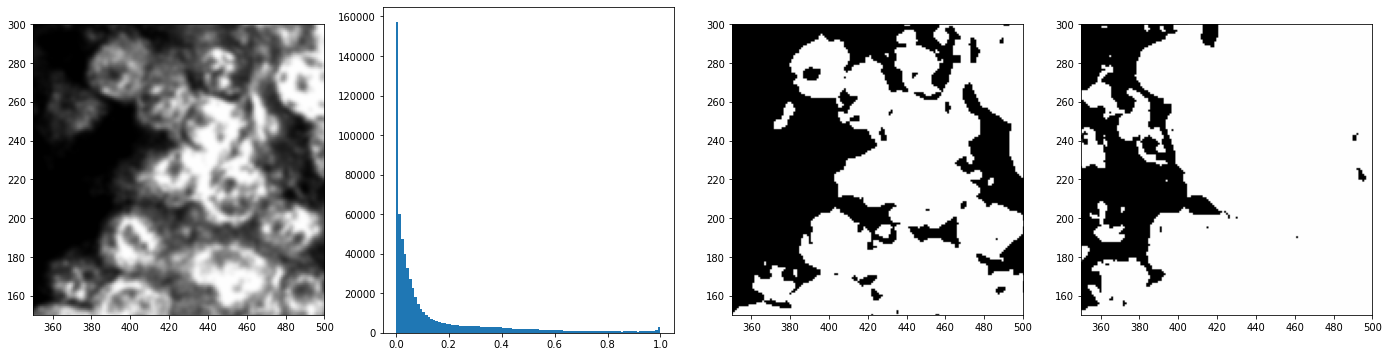

In [40]:
####################### Process NEUN
neun_im = image[:,:,2,:]
m_size = 2
g_sigma_1 = 1
g_sigma_2 = 10
im_filtered = neun_im.copy()
im_binary= im_filtered.copy()
for zi in range(neun_im.shape[-1]):
    im_zi = neun_im[:,:,zi]
    im_zi_mf = skimage.filters.median(im_zi, selem=np.ones([m_size,m_size]))   #### DeSpeckle
    im_zi = skimage.filters.gaussian(im_zi, sigma = g_sigma_1)   #### blur
    im_zi_bk = skimage.filters.gaussian(im_zi, sigma = g_sigma_2)  ### get background from big blur
    # im_zi = im_zi - im_zi_bk
    im_filtered[:,:,zi] = im_zi
    im_binary[:,:,zi] = im_filtered[:,:,zi]>filters.threshold_otsu(im_filtered[:,:,zi].flatten())*1

neun_im_f = im_filtered
neu_mask_z = im_binary
neu_mask_zp = np.max(neu_mask_z,axis=-1)


sp=5
fig,ax = plt.subplots(1,4,figsize=[24,6])
ax[0].imshow(neun_im_f[:,:,sp],cmap=white_map)
ax[1].hist(neun_im_f[:,:,sp].flatten(),100)
ax[2].imshow(neu_mask_z[:,:,sp],cmap=white_map)
ax[3].imshow(neu_mask_zp,cmap=white_map)


for ai in ax[[0, 2, 3]]:
    ai.set_xlim(350,500)
    ai.set_ylim(150,300)
plt.show()

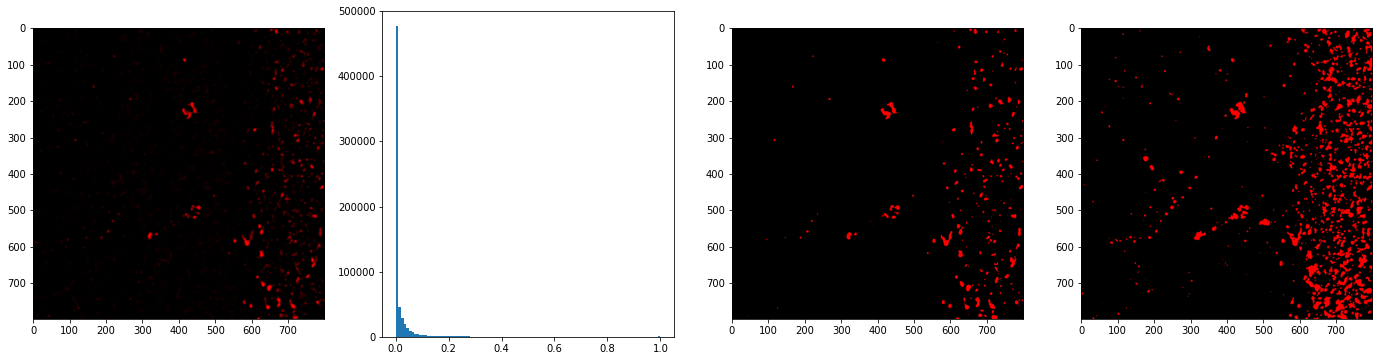

In [32]:
####################### Process mcherry
mcherry_im = image[:,:,1,:]
m_size = 2
g_sigma_1 = 2
g_sigma_2 = 10
saturation = 99.9
# m_size = 3
# g_sigma_1 = 5
# g_sigma_2 = 15
im_filtered = mcherry_im.copy()
im_binary = np.zeros_like(im_filtered)
for zi in range(neun_im.shape[-1]):
    im_zi = mcherry_im[:,:,zi]
    im_zi = im_zi/np.max(im_zi.flatten())
    im_zi = skimage.filters.median(im_zi, selem=np.ones([m_size,m_size]))   #### DeSpeckle
    im_zi = skimage.filters.gaussian(im_zi, sigma = g_sigma_1)   #### blur
    im_zi_bk = skimage.filters.gaussian(im_zi, sigma = g_sigma_2)  ### get background from big blur
    im_zi = im_zi - im_zi_bk
    im_zi[im_zi<0]=0
    im_zi = im_zi/np.percentile(im_zi.flatten(),saturation)
    im_zi[im_zi>1]=1
    im_filtered[:,:,zi] = im_zi
    im_binary[:,:,zi] = im_filtered[:,:,zi]>filters.threshold_otsu(im_filtered[:,:,zi].flatten())



mcherry_im_f = im_filtered
mcherry_mazk_z = im_binary
mcherry_mask_zp = np.max(mcherry_mazk_z,axis=-1)

sp=4
fig,ax = plt.subplots(1,4,figsize=[24,6])
ax[0].imshow(mcherry_im_f[:,:,sp],cmap=red_map)
ax[1].hist(mcherry_im_f[:,:,sp].flatten(),100)
ax[2].imshow(mcherry_mazk_z[:,:,sp],cmap=red_map)
ax[3].imshow(mcherry_mask_zp,cmap=red_map)


# for ai in ax[[0, 2, 3]]:
#     ai.set_xlim(350,500)
#     ai.set_ylim(150,300)
# plt.show()

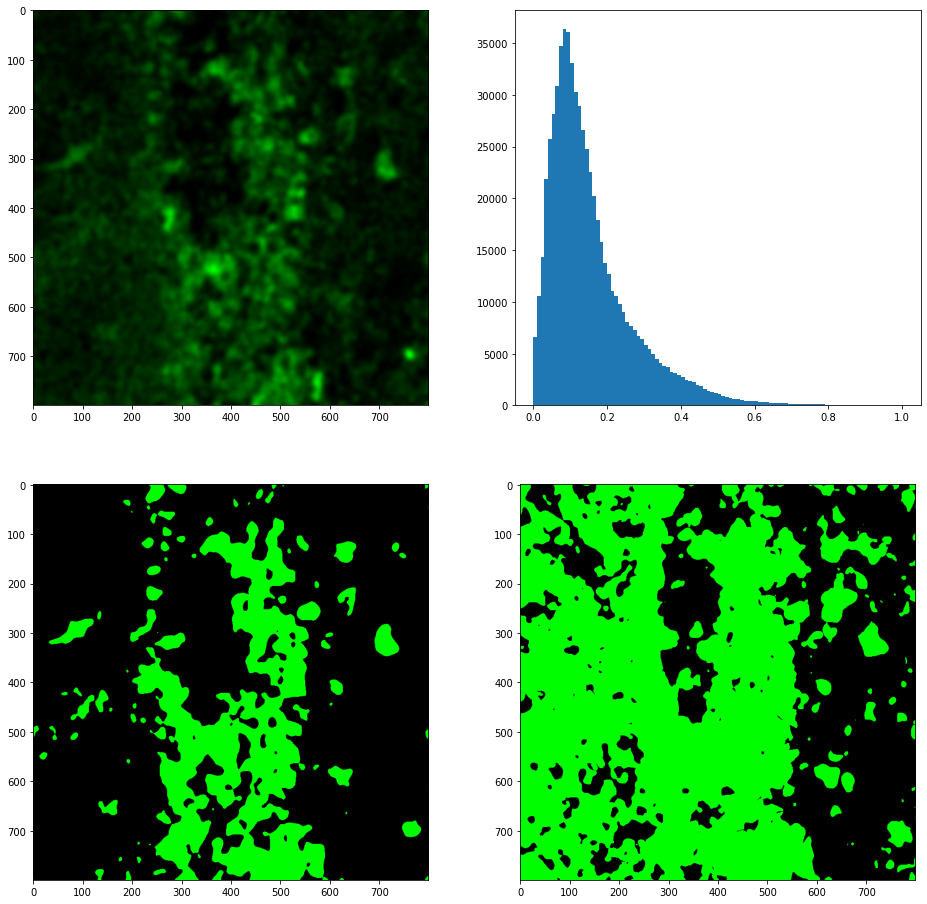

In [33]:
####################### Process CrispTarg
target_im = image[:,:,0,:]
m_size = 3
g_sigma_1 = 5
g_sigma_2 = 15
saturation = 100
im_filtered = target_im.copy()
im_binary = np.zeros_like(im_filtered)
for zi in range(target_im.shape[-1]):
    im_zi = target_im[:,:,zi]
    im_zi = skimage.filters.median(im_zi, selem=np.ones([m_size,m_size]))   #### DeSpeckle
    im_zi = skimage.filters.gaussian(im_zi, sigma = g_sigma_1)   #### blur
    im_zi_bk = skimage.filters.gaussian(im_zi, sigma = g_sigma_2)  ### get background from big blur
    # im_zi = im_zi - im_zi_bk
    # im_zi[im_zi_bs<0]=0
    im_zi = im_zi/np.percentile(im_zi.flatten(),saturation)
    im_filtered[:,:,zi] = im_zi
    im_binary[:,:,zi] = im_filtered[:,:,zi]>filters.threshold_otsu(im_filtered[:,:,zi].flatten())

target_im_f = im_filtered
target_mazk_z = im_binary
target_mask_zp = np.max(im_binary,axis=-1)

sp = 1
fig,ax = plt.subplots(2,2,figsize=[16,16])
ax=ax.flatten()
ax[0].imshow(target_im_f[:,:,sp],cmap=green_map)
ax[1].hist(target_im_f[:,:,sp].flatten(),100)
ax[2].imshow(target_mazk_z[:,:,sp],cmap=green_map)
ax[3].imshow(target_mask_zp,cmap=green_map)


# for ai in ax[[0, 2, 3]]:
#     ai.set_xlim(200,500)
#     ai.set_ylim(700,400)
# plt.show()

In [17]:


# neuronal_mcherry = neuronal_mcherry/np.max(neuronal_mcherry.flatten())
# neuronal_target = neuronal_target/np.max(neuronal_target.flatten())
# neuronal_neun = neuronal_neun/np.max(neuronal_neun.flatten())*2

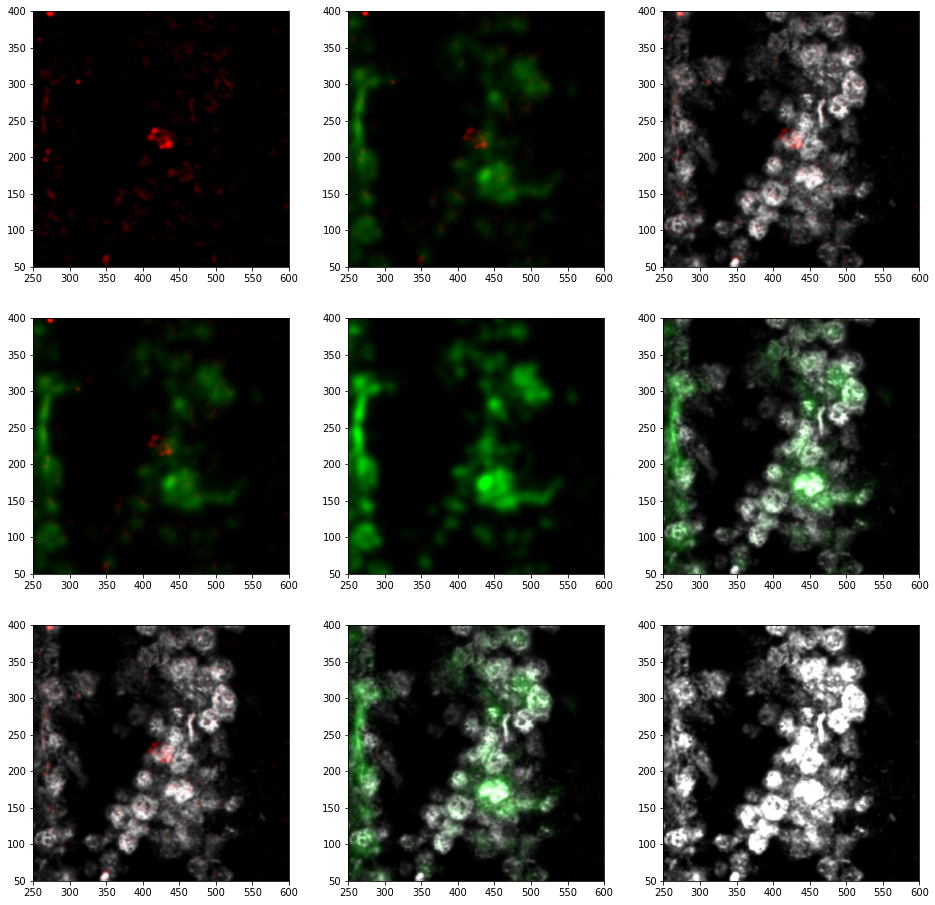

In [49]:
neuronal_mcherry = mcherry_im_f
neuronal_target = target_im_f
neuronal_neun = neun_im_f

sp=6
blanks = np.zeros_like(neuronal_mcherry)
neuronal_mcherry_rgb = np.stack([ neuronal_mcherry, blanks, blanks],axis = -2)
neuronal_target_rgb = np.stack([blanks, neuronal_target, blanks ],axis = -2)
neuronal_neun_rgb = np.stack([neuronal_neun, neuronal_neun, neuronal_neun ],axis = -2)

im_list = [neuronal_mcherry_rgb, neuronal_target_rgb, neuronal_neun_rgb]

fig,ax =plt.subplots(3,3,figsize = [16,16])
for im_i in range(len(im_list)):
    for im_i2 in range(len(im_list)):
        im_merge = (im_list[im_i] + im_list[im_i2])
        # im_merge = rgb_cmy(im_merge)*2
        ax[im_i,im_i2].imshow(im_merge[:,:,:,sp])


for ai in ax.flatten():
    ai.set_xlim(250,600)
    ai.set_ylim(50,400)
plt.show()

In [ ]:

def rgb_cmy(image,caxis=2,balance = [1,1,1]):

    image = np.moveaxis(image, caxis, 2)

    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]


    CYM_r = np.zeros_like(image)
    CYM_r[:,:,0] = image_R
    CYM_r[:,:,2] = image_R

    CYM_g = np.zeros_like(image)
    CYM_g[:,:,0] = image_G
    CYM_g[:,:,1] = image_G

    CYM_b = np.zeros_like(image)
    CYM_b[:,:,1] = image_B
    CYM_b[:,:,2] = image_B

    merge_cym = CYM_r*balance[0] + CYM_g*balance[1] + CYM_b*balance[2]
    merge_cym = merge_cym/np.max(merge_cym)
    return merge_cym

In [ ]:
import matplotlib as mpl

is_neuron = neu_mask_3d.flatten()>0
neuronal_mcherry_vals = mcherry_im.flatten()[is_neuron]
neuronal_target_vals = target_im.flatten()[is_neuron]
neuronal_mcherry_vals = (neuronal_mcherry_vals-np.mean(neuronal_mcherry_vals))/np.std(neuronal_mcherry_vals)
neuronal_target_vals = (neuronal_target_vals-np.mean(neuronal_target_vals))/np.std(neuronal_target_vals)
fig, ax = plt.subplots(1,3,figsize=[21,4])
ax[0].hist(neuronal_mcherry_vals)
ax[1].hist(neuronal_target_vals)
ax[2].hist2d(neuronal_mcherry_vals,neuronal_target_vals,norm=mpl.colors.LogNorm())
ax[2].set_xlabel('mcher')
ax[2].set_ylabel('targ')
plt.show()
